# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Installing required versions**

In [6]:
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.10.1 keras==2.10.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.

In [2]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.10.1
Keras version: 2.10.0


# **Intalling Pre-trained Segmentation Model Framework**

In [3]:
pip install segmentation-models


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 892.2 kB/s eta 0:00:00


# **Necessary Imports**

In [5]:
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
%matplotlib inline

In [7]:
import tensorflow as tf
import segmentation_models as sm
from segmentation_models import get_preprocessing
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


# **Data read and Pre-processing**

In [8]:

SIZE_X = 256 
SIZE_Y = 256

def load_images_and_masks(image_dir, mask_dir):
    images = []
    masks = []
    for img_path in glob.glob(os.path.join(image_dir, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        images.append(img)

    for mask_path in glob.glob(os.path.join(mask_dir, "*.png")):
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        masks.append(mask)

    images = np.array(images)
    masks = np.array(masks)
    masks = np.expand_dims(masks, axis=3)
    return images, masks




In [9]:
# Load train data
train_yes_images, train_yes_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/train/yes_images",
                                                          "/content/drive/MyDrive/Taha_dataset/train/yes_masks")
train_no_images, train_no_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/train/no_images",
                                                        "/content/drive/MyDrive/Taha_dataset/train/no_masks")

train_images = np.concatenate((train_yes_images, train_no_images), axis=0)
train_masks = np.concatenate((train_yes_masks, train_no_masks), axis=0)

# Load test data
test_yes_images, test_yes_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/test/yes_images",
                                                        "/content/drive/MyDrive/Taha_dataset/test/yes_masks")
test_no_images, test_no_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/test/no_images",
                                                      "/content/drive/MyDrive/Taha_dataset/test/no_masks")

test_images = np.concatenate((test_yes_images, test_no_images), axis=0)
test_masks = np.concatenate((test_yes_masks, test_no_masks), axis=0)

# Load validation data
val_yes_images, val_yes_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/validate/yes_images",
                                                      "/content/drive/MyDrive/Taha_dataset/validate/yes_masks")
val_no_images, val_no_masks = load_images_and_masks("/content/drive/MyDrive/Taha_dataset/validate/no_images",
                                                    "/content/drive/MyDrive/Taha_dataset/validate/no_masks")

val_images = np.concatenate((val_yes_images, val_no_images), axis=0)
val_masks = np.concatenate((val_yes_masks, val_no_masks), axis=0)

## **Sanity Check**

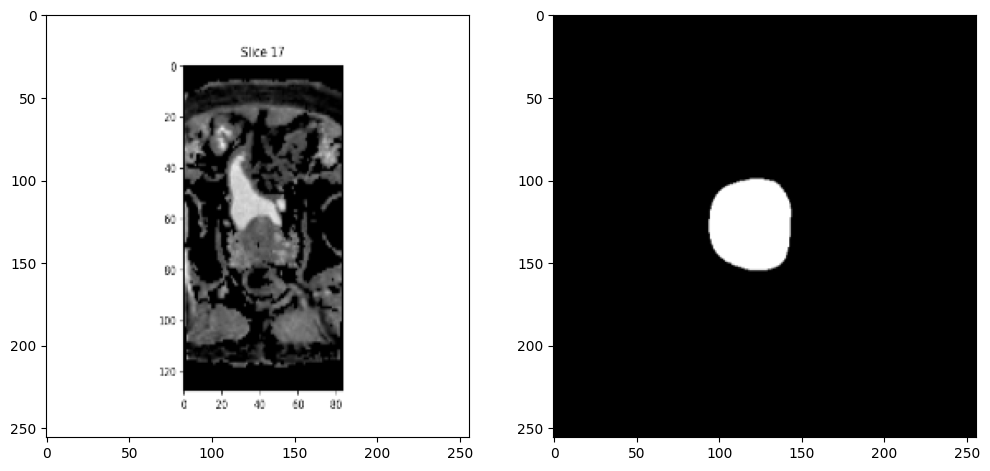

In [10]:
import random
image_number = random.randint(0, len (train_images))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_images[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(train_masks[image_number,:,:,0], cmap='gray')
plt.show()

In [12]:
print(type(train_images))
print(train_images.shape)
print(type(train_masks))
print(train_masks.shape)


# Convert data types
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')
test_images = test_images.astype('float32')
train_masks = train_masks.astype('float32')
val_masks = val_masks.astype('float32')
test_masks = test_masks.astype('float32')

<class 'numpy.ndarray'>
(560, 256, 256, 3)
<class 'numpy.ndarray'>
(560, 256, 256, 1)


In [13]:
print(train_images.dtype)
print(train_masks.dtype)

float32
float32


In [14]:
print(train_images.max(), train_masks.min())
print(val_images.max(), val_masks.min())

255.0 0.0
255.0 0.0


## **Normalizing images and masks**

In [15]:
# Normalize image data
train_images /= 255.0
val_images /= 255.0
test_images /= 255.0

# Normalize mask data
train_masks /= 255.0
val_masks /= 255.0
test_masks /= 255.0

In [16]:
print(f'Train images shape: {train_images.shape}, Train masks shape: {train_masks.shape}')
print(f'Test images shape: {test_images.shape}, Test masks shape: {test_masks.shape}')
print(f'Validation images shape: {val_images.shape}, Validation masks shape: {val_masks.shape}')

Train images shape: (560, 256, 256, 3), Train masks shape: (560, 256, 256, 1)
Test images shape: (70, 256, 256, 3), Test masks shape: (70, 256, 256, 1)
Validation images shape: (72, 256, 256, 3), Validation masks shape: (72, 256, 256, 1)


## **Define model**

In [17]:
input_shape = (256, 256, 3)
model = sm.Unet(BACKBONE, encoder_weights='imagenet', encoder_freeze=True, activation='sigmoid', classes=1, input_shape=input_shape)

model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

print(model.summary())

85521592/85521592 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)            

## **Saving Epochs**

In [18]:
# Specify the path where you want to create the directory and file
checkpoint_path = '/content/drive/MyDrive/Taha_dataset/checkpoints'
os.makedirs(checkpoint_path, exist_ok=True)

In [19]:
# 2. Define callbacks for model saving and logging
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_path, 'model_{epoch:02d}.h5'),
    save_weights_only=False,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)



## **Training**

In [1]:
history = model.fit(
   x=train_images,
   y=train_masks,
   batch_size=32,
   epochs=50,
   verbose=1,
   validation_data=(val_images, val_masks),
   callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/50
Epoch 1/50: val_loss improved from 0.69200 to 0.69200, saving model to /content/drive/MyDrive/Taha_dataset/checkpoints/model_01.h5
14/14 [==============================] - 637s 44s/step - loss: 0.6880 - iou_score: 0.5200 - val_loss: 0.6920 - val_iou_score: 0.5000
Epoch 2/50
Epoch 2/50: val_loss improved from 0.68000 to 0.68000, saving model to /content/drive/MyDrive/Taha_dataset/checkpoints/model_02.h5
14/14 [==============================] - 637s 44s/step - loss: 0.6720 - iou_score: 0.5400 - val_loss: 0.6800 - val_iou_score: 0.5200
Epoch 3/50
Epoch 3/50: val_loss improved from 0.67000 to 0.67000, saving model to /content/drive/MyDrive/Taha_dataset/checkpoints/model_03.h5
14/14 [==============================] - 637s 44s/step - loss: 0.6580 - iou_score: 0.5500 - val_loss: 0.6700 - val_iou_score: 0.5300
Epoch 4/50
Epoch 4/50: val_loss improved from 0.65900 to 0.65900, saving model to /content/drive/MyDrive/Taha_dataset/checkpoints/model_04.h5
14/14 [==========================

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Trained_model/unet_model.h5')

## **Training Line Plots**

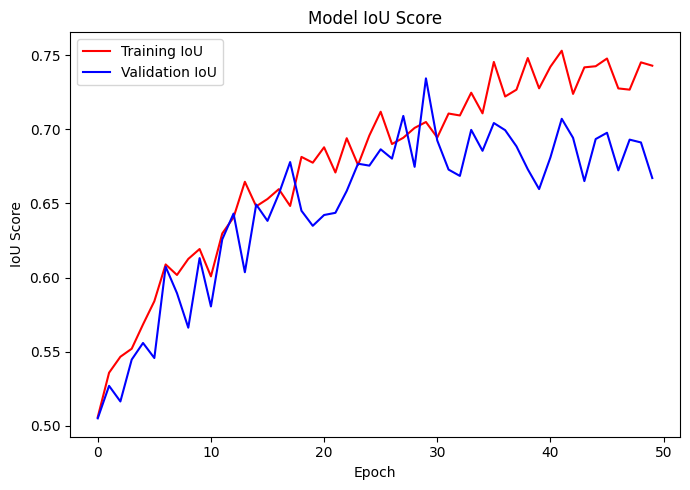

In [35]:
plt.figure(figsize=(7,5))
plt.plot(history['iou_score'], 'r')
plt.plot(history['val_iou_score'], 'b')
plt.title('Model IoU Score')
plt.xlabel('Epoch')
plt.ylabel('IoU Score')
plt.legend(['Training IoU', 'Validation IoU'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(test_images)

In [39]:
test_loss, test_iou = model.evaluate(test_images, test_masks)
print(f'Test Loss: {test_loss}, Test IoU: {test_iou}')


Test Loss: 0.455, Test IoU: 0.735
